# 02 Linear algebra assignment - student version

Code material dealing with Linear algebra. Use the `virtual environment` that you build for `this course`. Name the jupyter kernel as `open_cv`. 

For return, make a pdf document with the following:
- document the commands needed for jupyter kernel `open_cv` in cli
- fill in all code snippets that are marked with ToDo: (in the code cells below)
- run the code cells (=this notebook)
- return a document so that the code and outputs are shown
  - make sure that the jupyter kernel name is visible (in the vs code)



In [5]:
# common imports to all codes
import numpy as np

import cv2
import matplotlib.pyplot as plt


## Drawing a vector into coordinate system

In [6]:
# ToDo: Define the vector v to be visualized using next cell
v = np.array([3, 5])


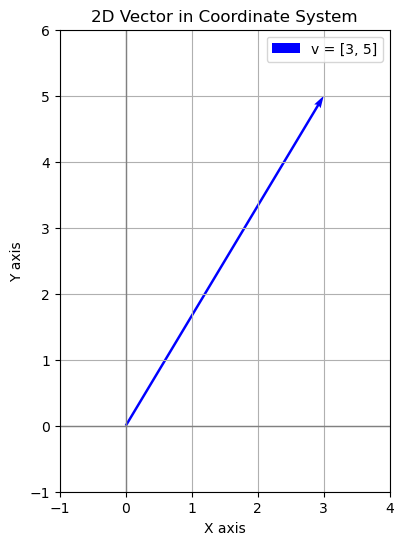

In [7]:
# Plotting setup for vector v
fig, ax = plt.subplots(figsize=(6, 6))

# Draw the vector using quiver
# angles='xy': Arrows point in the correct direction
# scale_units='xy': length corresponds to vector magnitude
# scale=1 : Coordinate grid is respected
ax.quiver(0, 0, v[0], v[1], angles='xy', scale_units='xy', scale=1, color='blue', label=f"v = [{v[0]}, {v[1]}]")

# Axis setup
ax.set_xlim(-1, max(v[0], 1) + 1)
ax.set_ylim(-1, max(v[1], 1) + 1)
ax.axhline(0, color='gray', lw=1)
ax.axvline(0, color='gray', lw=1)
ax.grid(True)
ax.set_aspect('equal')
ax.legend()
plt.title("2D Vector in Coordinate System")
plt.xlabel("X axis")
plt.ylabel("Y axis")
plt.show()

## Dot product

In [8]:

def show_dot_product(v1, v2, title):
    # Compute the dot product
    dot_product = np.dot(v1, v2)

    # Create a plot
    fig, ax = plt.subplots(figsize=(6, 6))

    # Draw vectors v1 and v2
    ax.quiver(0, 0, v1[0], v1[1], angles='xy', scale_units='xy', scale=1, color='blue', label=f"v1 = {v1}")
    ax.quiver(0, 0, v2[0], v2[1], angles='xy', scale_units='xy', scale=1, color='green', label=f"v2 = {v2}")

    # Display the dot product result
    midpoint = (v1 + v2) / 2
    ax.text(midpoint[0], midpoint[1], f"v1 • v2 = {dot_product}", fontsize=12, color='red')

    # Coordinate system setup
    ax.axhline(0, color='gray', lw=1)
    ax.axvline(0, color='gray', lw=1)
    ax.set_xlim(-1, max(v1[0], v2[0]) + 2)
    ax.set_ylim(-1, max(v1[1], v2[1]) + 2)
    ax.set_aspect('equal')
    ax.grid(True)
    ax.legend()
    plt.title(title)
    plt.xlabel("X axis")
    plt.ylabel("Y axis")
    plt.show()



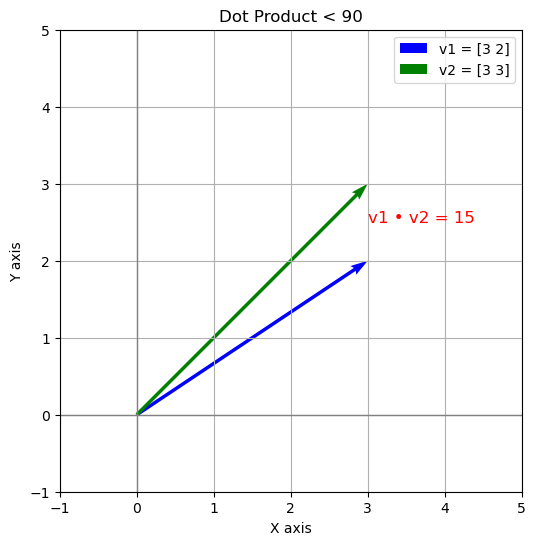

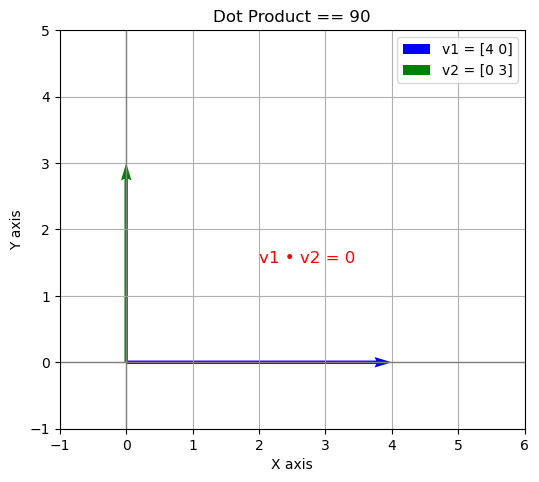

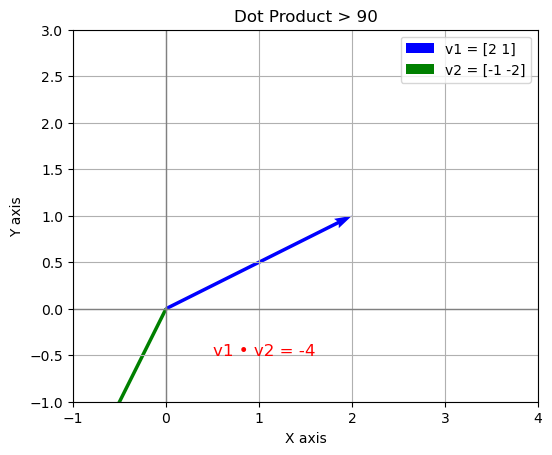

In [15]:
# ToDo: create suitable vectors to visualize the dot product:
# - define 2 vectors, where the angle between is <90°
# - define 2 vectors, where the angle between is ==90°
# - define 2 vectors, where the angle between is >90°
# Use show_dot_product() function display the vectors in xy-coordinate system
v1 = np.array([3,2])
v2 = np.array([3,3])
show_dot_product(v1, v2, "Dot Product < 90")

v1 = np.array([4,0])
v2 = np.array([0,3])
show_dot_product(v1, v2, "Dot Product == 90")

v1 = np.array([2,1])
v2 = np.array([-1,-2])
show_dot_product(v1, v2, "Dot Product > 90")


## Outer product of two vectors

The plot below visualizes the outer product of two 2D vectors 

- $\mathbf{u} = \begin{bmatrix} 2 \\ 1 \end{bmatrix}$ and $\mathbf{v} = \begin{bmatrix} 2 & 3 \end{bmatrix}$.  

- The result is a 2×2 matrix $\mathbf{uv} = \begin{bmatrix} 4 & 6 \\ 2 & 3 \end{bmatrix}$  
- Each column of the matrix is shown as a vector (blue and green) originating from the origin $\mathbf{uw_1} = 2 * u = \begin{bmatrix} 4 \\ 2 \end{bmatrix}$ and $\mathbf{uv_2} = 3 * u =\begin{bmatrix} 6 \\ 3 \end{bmatrix}$    
- Geometrically, the outer product produces a matrix whose columns are scaled copies of $\mathbf{u}$, scaled by the entries of $\mathbf{v}$.  

This operation is useful in tensor algebra, low-rank approximations, and constructing rank-1 matrices. ￼

In [17]:
# ToDo: Define two 2D vectors u (2x1) and v (1x2)
u = np.array([[2], [1]])    # column vector (2x1)
v = np.array([[2,3]])    # row vector (1x2)

# ToDo: Compute the outer product (result is 2x2 matrix)
outer = u @ v
print(outer)



[[4 6]
 [2 3]]


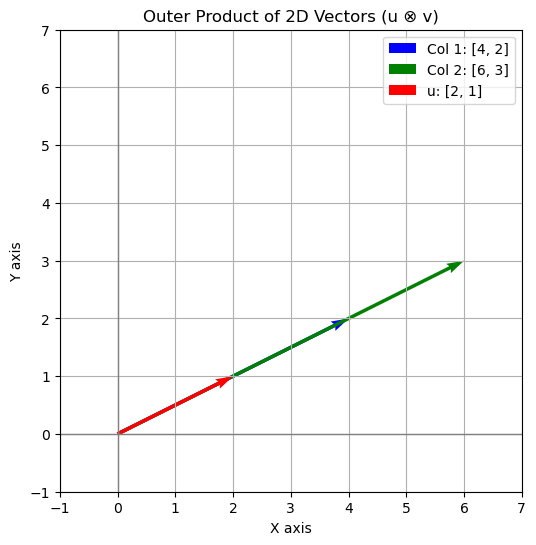

In [18]:
# Plot setup for showing u, v and their outer product
fig, ax = plt.subplots(figsize=(6, 6))

# Plot the original and columns of the outer product matrix as vectors

ax.quiver(0, 0, outer[0, 0], outer[1, 0], angles='xy', scale_units='xy', scale=1, color='blue', label=f"Col 1: [{outer[0, 0]}, {outer[1, 0]}]")
ax.quiver(0, 0, outer[0, 1], outer[1, 1], angles='xy', scale_units='xy', scale=1, color='green', label=f"Col 2: [{outer[0, 1]}, {outer[1, 1]}]")

u_vec = ax.quiver(0, 0, u[0, 0], u[1, 0], angles='xy', scale_units='xy', scale=1, color='red', label=f'u: [{u[0, 0]}, {u[1, 0]}]')

# Axes setup
ax.axhline(0, color='gray', lw=1)
ax.axvline(0, color='gray', lw=1)
ax.set_xlim(-1, np.max(np.abs(outer)) + 1)
ax.set_ylim(-1, np.max(np.abs(outer)) + 1)
ax.set_aspect('equal')
ax.grid(True)
ax.legend()
plt.title("Outer Product of 2D Vectors (u ⊗ v)")
plt.xlabel("X axis")
plt.ylabel("Y axis")
plt.show()

## R B G channels of a image

In [31]:
# ToDo: Load the lena.jpeg image and display the R-, G and B-channels of this color image separately
# - you can use the code snippet in the next cell to display the images as long as the image names are same
#   - image_rgb = original, 
#   - r_channel = r channel image, 
#   - g_channel = g channel image, 
#   - b_channel = b channel image

# read image
# because cv2 is 32 bit
# it is not rgb colors but bgr colors
image_bgr = cv2.imread('lena.jpeg') 

# so what we need to do, is transform colors to rgb
image_rgb = cv2.cvtColor(image_bgr, cv2.COLOR_BGR2RGB)

# Split the channels
r_channel = image_rgb[:, :, 0]
g_channel = image_rgb[:, :, 1]
b_channel = image_rgb[:, :, 2]


In [32]:
image_bgr.shape, image_bgr

((225, 225, 3),
 array([[[120, 133, 231],
         [120, 133, 231],
         [119, 132, 230],
         ...,
         [104, 125, 217],
         [123, 144, 235],
         [115, 113, 219]],
 
        [[119, 132, 230],
         [119, 132, 230],
         [119, 132, 230],
         ...,
         [128, 143, 235],
         [145, 161, 250],
         [127, 119, 220]],
 
        [[119, 132, 230],
         [118, 131, 229],
         [118, 131, 229],
         ...,
         [109, 115, 204],
         [106, 112, 201],
         [ 76,  61, 153]],
 
        ...,
 
        [[ 74,  34,  92],
         [ 65,  27,  87],
         [ 59,  22,  84],
         ...,
         [ 72,  51, 126],
         [ 80,  59, 134],
         [ 76,  61, 152]],
 
        [[ 74,  34,  92],
         [ 64,  26,  86],
         [ 57,  20,  82],
         ...,
         [ 79,  58, 133],
         [ 91,  70, 145],
         [ 76,  67, 158]],
 
        [[ 54,  19,  75],
         [ 74,  38,  98],
         [ 61,  24,  92],
         ...,
         [ 8

In [33]:
image_rgb.shape, image_rgb

((225, 225, 3),
 array([[[231, 133, 120],
         [231, 133, 120],
         [230, 132, 119],
         ...,
         [217, 125, 104],
         [235, 144, 123],
         [219, 113, 115]],
 
        [[230, 132, 119],
         [230, 132, 119],
         [230, 132, 119],
         ...,
         [235, 143, 128],
         [250, 161, 145],
         [220, 119, 127]],
 
        [[230, 132, 119],
         [229, 131, 118],
         [229, 131, 118],
         ...,
         [204, 115, 109],
         [201, 112, 106],
         [153,  61,  76]],
 
        ...,
 
        [[ 92,  34,  74],
         [ 87,  27,  65],
         [ 84,  22,  59],
         ...,
         [126,  51,  72],
         [134,  59,  80],
         [152,  61,  76]],
 
        [[ 92,  34,  74],
         [ 86,  26,  64],
         [ 82,  20,  57],
         ...,
         [133,  58,  79],
         [145,  70,  91],
         [158,  67,  76]],
 
        [[ 75,  19,  54],
         [ 98,  38,  74],
         [ 92,  24,  61],
         ...,
         [15

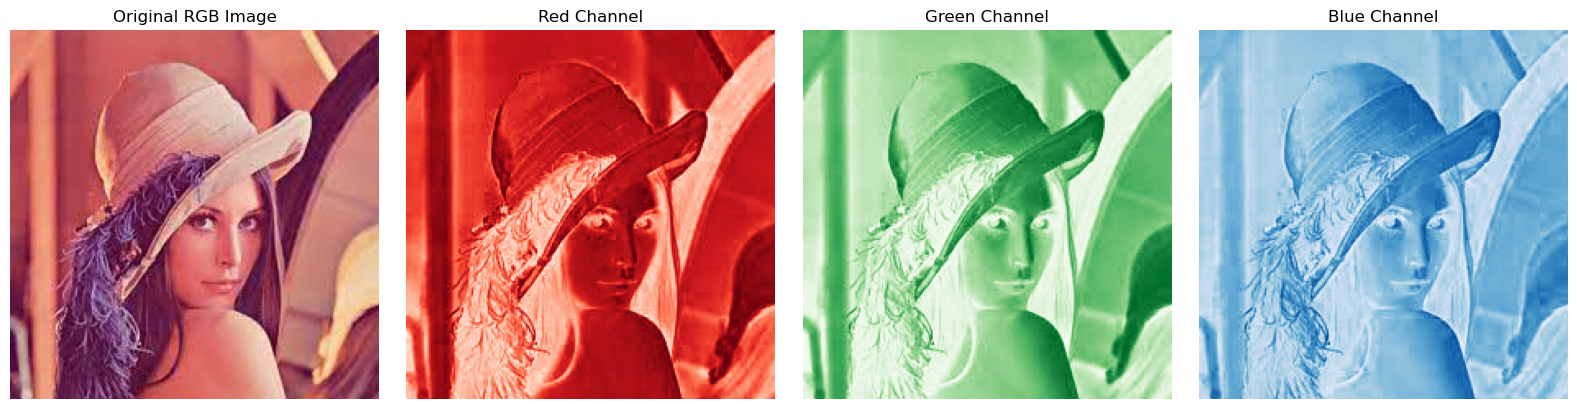

In [34]:
# - code snippet to plot the original image and r, g and b channels
fig, axs = plt.subplots(1, 4, figsize=(16, 4))

axs[0].imshow(image_rgb)
axs[0].set_title("Original RGB Image")
axs[0].axis('off')

axs[1].imshow(r_channel, cmap='Reds')
axs[1].set_title("Red Channel")
axs[1].axis('off')

axs[2].imshow(g_channel, cmap='Greens')
axs[2].set_title("Green Channel")
axs[2].axis('off')

axs[3].imshow(b_channel, cmap='Blues')
axs[3].set_title("Blue Channel")
axs[3].axis('off')

plt.tight_layout()
plt.show()

In [35]:
r_channel.shape, r_channel

((225, 225),
 array([[231, 231, 230, ..., 217, 235, 219],
        [230, 230, 230, ..., 235, 250, 220],
        [230, 229, 229, ..., 204, 201, 153],
        ...,
        [ 92,  87,  84, ..., 126, 134, 152],
        [ 92,  86,  82, ..., 133, 145, 158],
        [ 75,  98,  92, ..., 153, 160, 178]], dtype=uint8))